<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/master/generation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
!pip install sdv

In [9]:
import matplotlib.pyplot as plt


In [12]:
df  = pd.read_csv('/content/Proc_data_1.csv')

In [17]:

df.drop(['Hemoglobin','Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19'], axis=1)

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,269.0,269.0,10.02,10.02,107.0,76.0,female,68.90,68.90,"цефтриаксон, дексаметазон, аскорб. к-та, ац...",15:02:1940,23:12:2020,19:01:2021,1,1,0,0,0,0,0,0.0,381.4,61.6,0.10,0.10
1,282.0,282.0,6.14,6.14,78.0,59.0,female,30.00,36.00,"меропенем, озельтамивир, фраксипарин, ранитид...",23:01:1985,26:12:2018,15:02:2019,0,0,0,0,0,0,0,0.0,56.0,96.0,0.05,0.05
2,440.0,440.0,7.59,7.59,656.0,88.0,female,5.74,61.50,"цефтриаксон, омепразол, гепарин,левофлоксацин...",03:08:1955,07:07:2020,24:07:2020,1,0,0,0,0,0,0,1.0,17.0,25.0,0.20,0.20
3,228.0,228.0,10.65,10.65,59.0,43.0,female,113.50,124.20,"гепарин, аспикард, омепразол, амброксол, дек...",13:12:1949,28:06:2020,21:07:2020,1,0,1,0,0,0,0,0.0,21.0,16.0,0.23,0.23
4,236.0,236.0,13.88,13.88,107.0,95.0,male,36.10,171.60,"ванкомицин, кпс, фуросемид, имепенем, ацетилц...",18:03:1954,21:10:2020,20:11:2020,1,1,1,0,0,0,0,2.0,0.0,0.0,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,249.0,249.0,7.19,7.19,93.0,93.0,male,27.20,27.20,"левофлоксацин, амброксол, аспикард, омепразол...",20:07:1957,06:01:2021,15:01:2021,1,0,1,0,0,0,0,1.0,53.2,18.7,0.07,0.07
69,327.0,327.0,16.24,16.24,133.0,93.0,male,27.10,27.10,"цефтриаксон, дексаметазон, гепарин, парацетам...",04:11:1979,19:12:2020,06:01:2021,1,1,0,0,0,1,0,2.0,34.6,31.4,0.07,0.07
70,234.0,234.0,9.90,9.90,151.0,114.0,male,170.00,170.00,"имепенем. левофлоксацин, озельтамивир, тигац...",01:01:1957,01:11:2018,03:12:2018,1,1,1,1,0,0,0,2.0,150.0,147.0,0.37,0.37
71,233.0,233.0,3.25,3.25,84.0,84.0,male,6.00,12.00,"цефоперазон/сульбактам/сульбактам, левофлокса...",06:03:1966,09:10:2018,02:11:2018,1,1,0,0,0,0,0,1.0,109.0,77.0,0.14,0.14


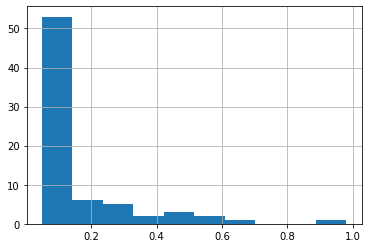

In [ ]:
df['Initial_Procalcitonine'].hist()


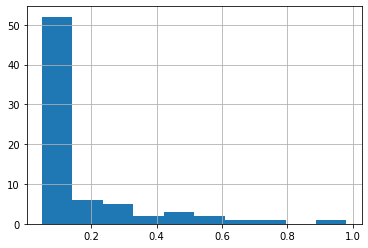

In [ ]:
df['Max_Procalcitonine'].hist()

In [18]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)
new_data_1 = model.sample(400)
new_data_1.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Unnamed: 0,Unnamed: 0.1,ID,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,318,318,4524.257356,348.358674,348.332323,8.095622,8.093874,[138. 150.],114.261310,147.722695,male,0.221229,15.485036,"цефтриаксон, фрагмин, фраксипарин, дексаметазо...",19:02:1971,24:12:2020,01:02:2021,в 34 инфекция вызванная covid 19 мазок пцр на ...,1,1,0,1,0,0,0,0,0.715693,83.551113,39.360674,0.054286,0.052739
1,298,298,6503.763890,400.340408,400.329005,17.305976,17.298519,[144. 128. 126. 123. 125. 134. 152. 168. 160.],97.778914,73.240141,male,5.665226,78.352789,цефтриаксон.левофлоксацин.гепарин.фолиевая ки...,16:02:1985,10:07:2020,24:12:2020,в342 инфекция вызванная covid19 кт 100720экспр...,1,1,0,1,0,0,0,0,0.738918,92.477036,20.619833,0.070746,0.072630
2,294,294,2701.889942,407.026441,406.851968,10.114930,10.115359,[133. 134. 129. 125. 135.],103.579878,66.169773,female,125.763861,72.191066,"цефтриаксон, дексаметазон, аскорб. к-та, ац...",15:02:1940,25:12:2020,22:01:2021,в 342 тяжёлая коронавирусная инфекция реконвал...,1,1,1,0,0,0,0,0,1.461929,22.189746,21.345913,0.106993,0.109661
3,299,299,2829.982474,257.691811,257.597682,14.653290,14.650459,[144. 149. 162.],69.984156,45.987432,male,73.234240,137.080146,None,06:07:1970,11:12:2020,23:12:2020,в 34 инфекция вызванная сovid19 пцр от 1112202...,1,1,2,0,0,0,0,0,1.475143,93.048580,47.408772,0.144759,0.214738
4,303,303,6798.565222,242.046519,241.994486,9.836508,9.833937,[143. 140. 140. 119. 58. 101.],58.275253,50.022998,male,7.248751,33.742667,тайгециклин( по 50 мг 2 р\сут с 30.10.20 по 0...,06:08:1973,30:09:2020,09:11:2020,лимфопролиферативное заболевание инфекция вызв...,0,1,0,1,0,0,0,0,1.791642,18.665207,51.058533,0.050234,0.060570


In [19]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)

In [20]:
from sdv.tabular import GaussianCopula
model_ = GaussianCopula()
model_.fit(data)
new_data_1_ = model.sample(400)
new_data_1_.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Unnamed: 0,Unnamed: 0.1,ID,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,305,305,8519.755799,451.629501,451.646182,11.625356,11.629526,[164. 164. 164.],114.370263,136.409924,male,1.280283,13.917055,"дексаметазон, кпс, аспикард, лозартон аторвас...",22:06:1955,13:11:2020,23:07:2020,инфекция ср ст тяжэт 231220 м пол джи отрвнего...,0,1,0,1,0,0,0,0,0.849875,102.317346,58.432519,0.351636,0.342467
1,213,213,3622.215468,-30.119440,-30.109946,8.045245,8.046350,[133. 134. 129. 125. 135.],107.646465,67.277971,male,190.090552,210.626175,None,15:02:1940,17:12:2020,01:02:2021,в 342 тяжёлая коронавирусная инфекция реконвал...,1,1,1,0,0,0,0,0,1.016863,225.779953,87.575656,0.051798,0.051837
2,313,313,4108.305344,68.853604,68.925117,7.311479,7.305042,[145.],106.341133,62.310109,female,78.447109,132.774568,"цефтриаксон, дексаметазон, гидроксихлорохин,...",10:01:1952,20:12:2020,29:12:2020,в 342 тяжёлая коронавирусная инфекцияэт на ат ...,1,1,1,1,0,0,0,0,0.257570,95.480911,48.525126,0.054781,0.052865
3,273,273,5785.791005,220.689792,220.657121,7.101137,7.101667,[117. 122. 115. 116. 121.],123.214871,101.391750,female,8.878393,46.133046,"цефтриаксон, левофлоксацин, дексаметазон, гепа...",12:07:1981,17:12:2020,31:12:2020,в 34 инфекция вызванная covid 19 пцр положит о...,1,1,0,0,0,0,0,0,1.863413,141.409456,141.105463,0.053384,0.050479
4,302,302,1757.841858,464.747100,464.725307,10.876287,10.872180,[103. 144. 146.],88.820492,65.477755,female,104.328120,159.138097,"левофлоксацин, амброксол, аспикард, омепразол...",20:07:1957,06:01:2021,15:01:2021,b342 среднетяжёлая короновирусная sarscov2 ig ...,1,1,1,1,0,0,0,0,1.596056,138.405256,48.728331,0.051602,0.050981


In [21]:
from sdv.tabular import CTGAN

model2 = CTGAN()
model2.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [23]:
new_data_2 = model2.sample(400)

In [22]:
model2_ = CTGAN()
model2_.fit(data)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [24]:
new_data_2_ = model2_.sample(400)

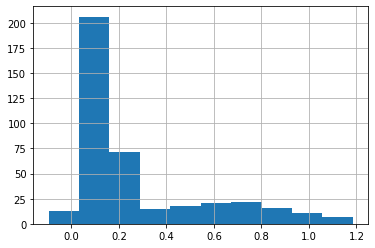

In [25]:
new_data_2_['Max_Procalcitonine'].hist()

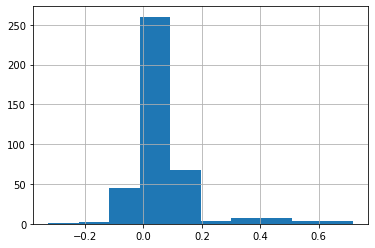

In [26]:
new_data_2['Max_Procalcitonine'].hist()

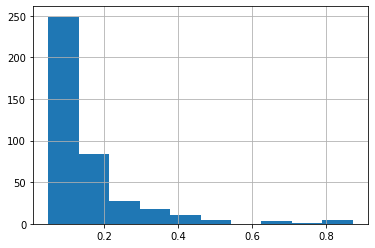

In [27]:
new_data_1_['Max_Procalcitonine'].hist()

In [253]:
from sdv.tabular import TVAE

model = TVAE()
model.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [ ]:
new_data = model.sample(500)

In [113]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)
new_data_1['Age'] =  new_data_1['Age'].map(lambda x: x + 10 if x < 10 else x)

KeyError: ignored

In [254]:
new_data_2 = model.sample(500)

In [316]:
new_data_2.to_csv('gen_Data_16_02_2021.csv')

AttributeError: ignored

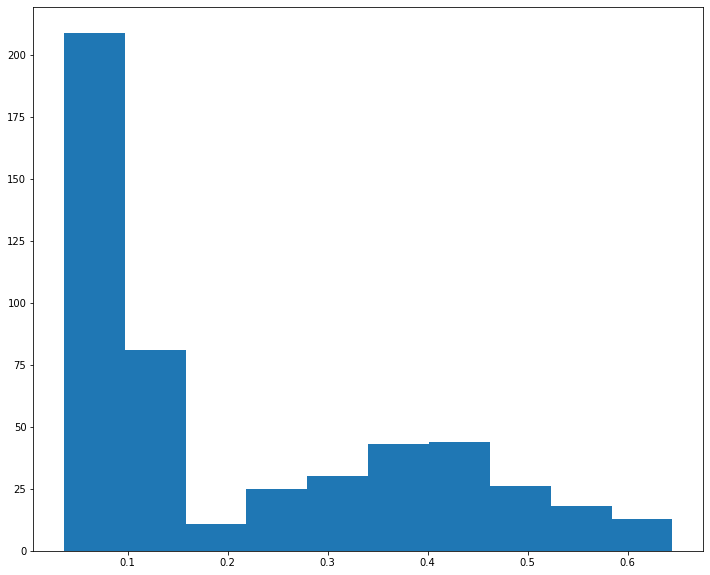

In [314]:
new_data_2['Max_Procalcitonine'].hist()

In [255]:
new_data_2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Max_Platlets', 'Min_Platlets',
       'Max_Leucocytes', 'Min_Leucocytes', 'Hemoglobin', 'Max_Creatinine',
       'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP', 'Treatment',
       'Birthday', 'Admission', 'Discharge', 'Diagnosis', 'COVID-19',
       'Pneumonia', 'Severity', 'IHD', 'COPD', 'Bronchial_asthma', 'Obesity',
       'Diabetes', 'RF', 'ALT', 'AST', 'Initial_Procalcitonine',
       'Max_Procalcitonine', 'duration', 'Age'],
      dtype='object')

In [256]:

new_data_2['Age'] =  new_data_2['Age'].map(lambda x: x + 10 if x < 10 else x)

In [257]:
dataf = new_data_2.copy()

In [258]:
dataf = dataf.drop(['Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19', "Treatment", 'duration',
          'Birthday', 'Admission', 'Discharge', 'Diagnosis',
          'Pneumonia', 'Hemoglobin'], axis=1)

In [198]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [259]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [260]:
def ind_ab(x):
  if x > .4:
    return 1
  else:
    return 0

In [261]:
dataf['Ab_ind'] = dataf['Max_Procalcitonine'].apply(ind_ab)

In [262]:
dataf['Ab_ind'].value_counts()

0    398
1    102
Name: Ab_ind, dtype: int64

In [263]:
dataf = dataf.drop(['Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19', "Treatment"], axis=1)

KeyError: ignored

In [264]:
neg, pos = np.bincount(dataf['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 500
    Positive: 102 (20.40% of total)



In [265]:
dataf[['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
        'Max_Creatinine', 'Min_Cratinine', 'Gender',
       'initial_CRP', 'Max_CRP', 'Pneumonia', 'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST', 'Age',
       'Ab_ind']].describe

KeyError: ignored

In [266]:
cleaned_df = dataf.copy()


In [267]:
cleaned_df['Gender'] = cleaned_df['Gender'].map({'male': 1, 'female': 0})

In [268]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Ab_ind'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Ab_ind'))
test_labels = np.array(test_df.pop('Ab_ind'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [269]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (320,)
Validation labels shape: (80,)
Test labels shape: (100,)
Training features shape: (320, 21)
Validation features shape: (80, 21)
Test features shape: (100, 21)


In [270]:
cleaned_df.columns

Index(['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
       'Max_Creatinine', 'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP',
       'Severity', 'IHD', 'COPD', 'Bronchial_asthma', 'Obesity', 'Diabetes',
       'RF', 'ALT', 'AST', 'Initial_Procalcitonine', 'Max_Procalcitonine',
       'Age', 'Ab_ind'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


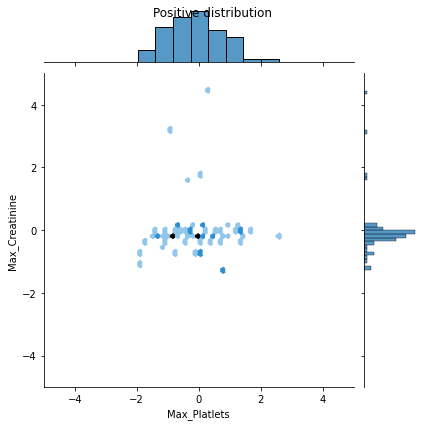

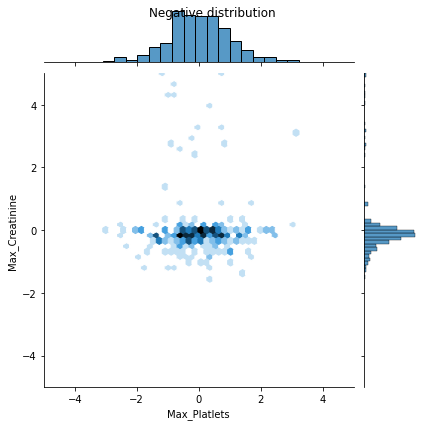

In [271]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['Max_Platlets'], pos_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Max_Platlets'], neg_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [272]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [273]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [274]:
model = make_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                352       
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 17        
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [275]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.6334


In [276]:
initial_bias = np.log([pos/neg])
initial_bias

array([-1.36147919])

In [277]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.28993124],
       [0.3088507 ],
       [0.20008928],
       [0.16725698],
       [0.27434862],
       [0.24614039],
       [0.15277398],
       [0.24484864],
       [0.3503549 ],
       [0.22596067]], dtype=float32)

In [278]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.5457


In [279]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [280]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [281]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [282]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

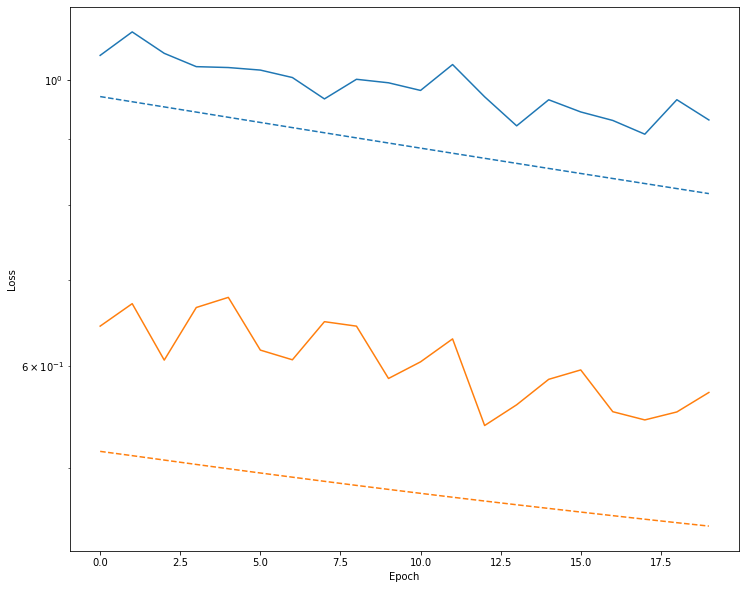

In [283]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [284]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6458 - tp: 45.0000 - fp: 76.0000 - tn: 242.0000 - fn: 37.0000 - accuracy: 0.7175 - precision: 0.3719 - recall: 0.5488 - auc: 0.7157 - val_loss: 0.5147 - val_tp: 12.0000 - val_fp: 9.0000 - val_tn: 54.0000 - val_fn: 5.0000 - val_accuracy: 0.8250 - val_precision: 0.5714 - val_recall: 0.7059 - val_auc: 0.8245
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 0.6240 - tp: 30.0000 - fp: 64.0000 - tn: 191.0000 - fn: 35.0000 - accuracy: 0.6906 - precision: 0.3191 - recall: 0.4615 - auc: 0.6594 - val_loss: 0.5106 - val_tp: 12.0000 - val_fp: 9.0000 - val_tn: 54.0000 - val_fn: 5.0000 - val_accuracy: 0.8250 - val_precision: 0.5714 - val_recall: 0.7059 - val_auc: 0.8259
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.6254 - tp: 38.0000 - fp: 68.0000 - tn: 187.0000 - fn: 27.0000 - accuracy: 0.7031 - precision: 0.3585 - recall: 0.5846 - auc: 0.7111 - val_loss: 0.5066 - val_tp: 12.00

In [285]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

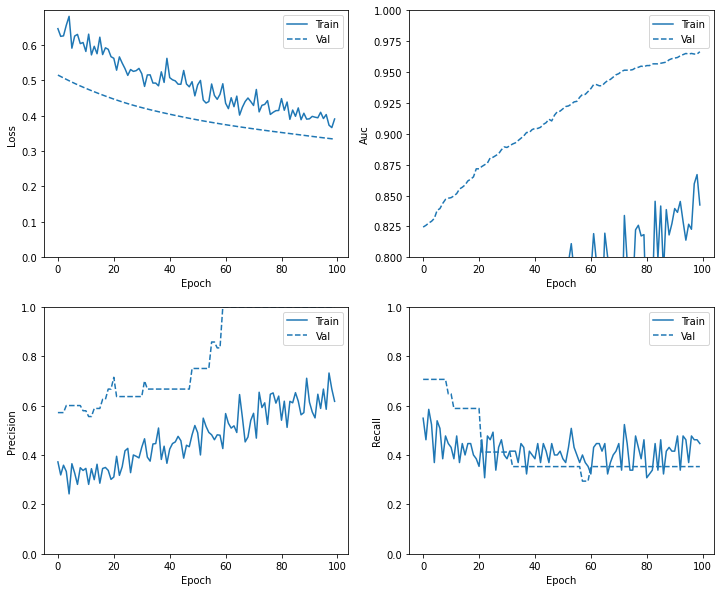

In [286]:
plot_metrics(baseline_history)

In [287]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [288]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.34024521708488464
tp :  3.0
fp :  2.0
tn :  78.0
fn :  17.0
accuracy :  0.8100000023841858
precision :  0.6000000238418579
recall :  0.15000000596046448
auc :  0.9471875429153442

Legitimate Transactions Detected (True Negatives):  78
Legitimate Transactions Incorrectly Detected (False Positives):  2
Fraudulent Transactions Missed (False Negatives):  17
Fraudulent Transactions Detected (True Positives):  3
Total Fraudulent Transactions:  20


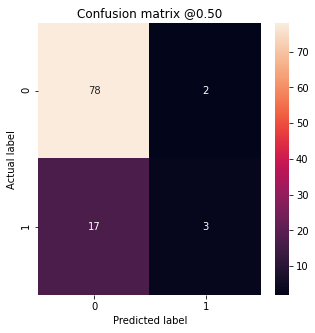

In [289]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [290]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

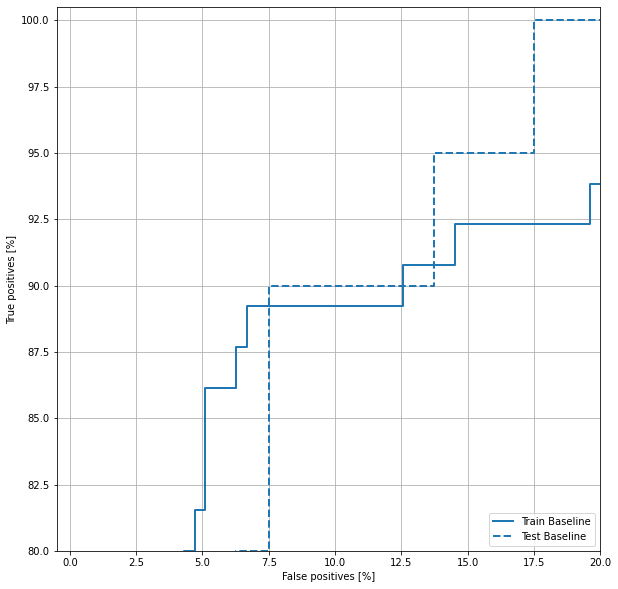

In [291]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [292]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.63
Weight for class 1: 2.45


In [293]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.7038 - tp: 41.0000 - fp: 75.0000 - tn: 260.0000 - fn: 44.0000 - accuracy: 0.7167 - precision: 0.3534 - recall: 0.4824 - auc: 0.7146 - val_loss: 0.5172 - val_tp: 12.0000 - val_fp: 10.0000 - val_tn: 53.0000 - val_fn: 5.0000 - val_accuracy: 0.8125 - val_precision: 0.5455 - val_recall: 0.7059 - val_auc: 0.8259
Epoch 2/100
1/1 [==============================] - 0s 54ms/step - loss: 0.6727 - tp: 35.0000 - fp: 68.0000 - tn: 187.0000 - fn: 30.0000 - accuracy: 0.6938 - precision: 0.3398 - recall: 0.5385 - auc: 0.6849 - val_loss: 0.5153 - val_tp: 12.0000 - val_fp: 10.0000 - val_tn: 53.0000 - val_fn: 5.0000 - val_accuracy: 0.8125 - val_precision: 0.5455 - val_recall: 0.7059 - val_auc: 0.8282
Epoch 3/100
1/1 [==============================] - 0s 54ms/step - loss: 0.7272 - tp: 29.0000 - fp: 70.0000 - tn: 185.0000 - fn: 36.0000 - accuracy: 0.6687 - precision: 0.2929 - recall: 0.4462 - auc: 0.6359 - val_loss: 0.5136 - val_tp: 12.

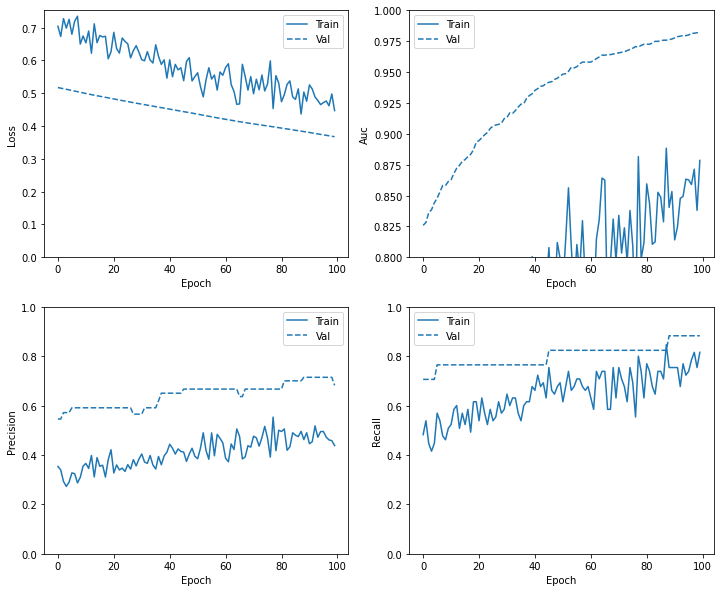

In [294]:
plot_metrics(weighted_history)

In [295]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.3904975652694702
tp :  20.0
fp :  11.0
tn :  69.0
fn :  0.0
accuracy :  0.8899999856948853
precision :  0.6451612710952759
recall :  1.0
auc :  0.9603124856948853

Legitimate Transactions Detected (True Negatives):  69
Legitimate Transactions Incorrectly Detected (False Positives):  11
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  20
Total Fraudulent Transactions:  20


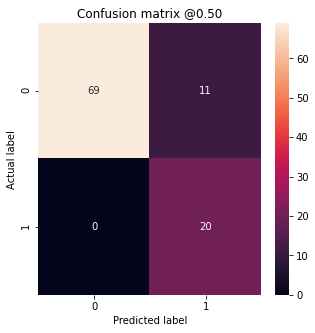

In [296]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

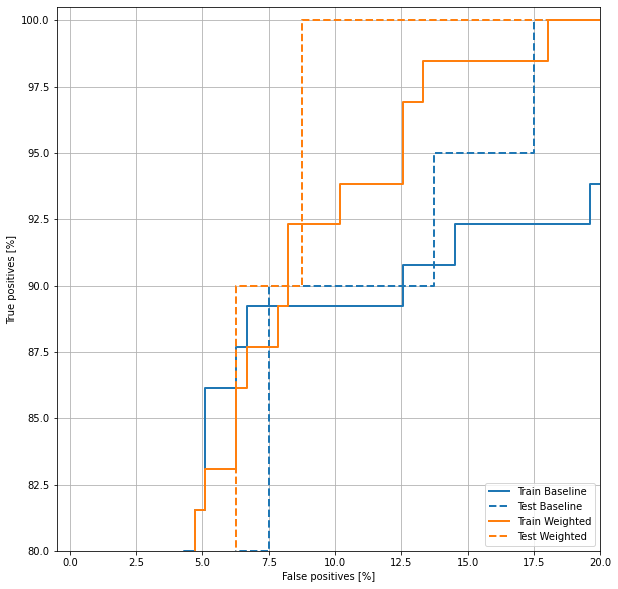

In [297]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [298]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [299]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(255, 21)

In [300]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(510, 21)

In [301]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [302]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [ 1.71792483 -0.41278974 -0.48517506  0.12325301  0.00804426 -0.20228087
 -0.80590603  0.99999845  1.62715551 -0.94524659 -0.47545099 -0.33333333
 -0.07930516 -0.27170849  0.         -0.41460093 -0.98018707  1.19659961
 -0.4391803   1.71016225 -2.68705543]

Label:  1


In [303]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [304]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.50244140625


In [305]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1.0

In [306]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.8199 - tp: 888.0000 - fp: 732.0000 - tn: 371.0000 - fn: 157.0000 - accuracy: 0.5861 - precision: 0.5481 - recall: 0.8498 - auc: 0.6561 - val_loss: 0.9719 - val_tp: 17.0000 - val_fp: 52.0000 - val_tn: 11.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.3500 - val_precision: 0.2464 - val_recall: 1.0000 - val_auc: 0.8240
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 0.7837 - tp: 901.0000 - fp: 700.0000 - tn: 328.0000 - fn: 119.0000 - accuracy: 0.6001 - precision: 0.5628 - recall: 0.8833 - auc: 0.6811 - val_loss: 0.9630 - val_tp: 17.0000 - val_fp: 52.0000 - val_tn: 11.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.3500 - val_precision: 0.2464 - val_recall: 1.0000 - val_auc: 0.8259
Epoch 3/100
1/1 [==============================] - 0s 77ms/step - loss: 0.7762 - tp: 919.0000 - fp: 715.0000 - tn: 287.0000 - fn: 127.0000 - accuracy: 0.5889 - precision: 0.5624 - recall: 0.8786 - auc: 0.6651 - val_loss: 0.9

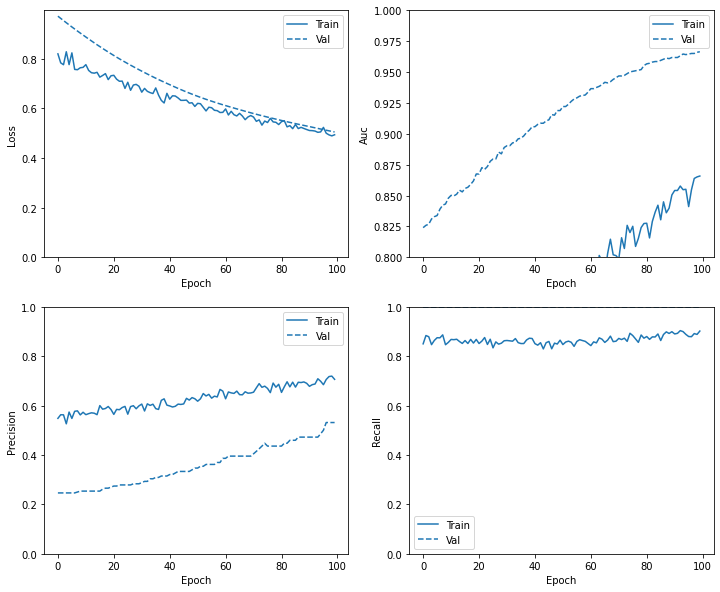

In [307]:
plot_metrics(resampled_history)

In [308]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 4s 75ms/step - loss: 0.7873 - tp: 9668.5238 - fp: 7576.5714 - tn: 3739.9524 - fn: 1525.4286 - accuracy: 0.5941 - precision: 0.5587 - recall: 0.8654 - auc: 0.6658 - val_loss: 0.8200 - val_tp: 17.0000 - val_fp: 45.0000 - val_tn: 18.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.4375 - val_precision: 0.2742 - val_recall: 1.0000 - val_auc: 0.8669
Epoch 2/1000
20/20 [==============================] - 0s 24ms/step - loss: 0.6972 - tp: 9561.3333 - fp: 6590.5238 - tn: 4643.4762 - fn: 1635.1429 - accuracy: 0.6309 - precision: 0.5895 - recall: 0.8547 - auc: 0.7111 - val_loss: 0.7012 - val_tp: 17.0000 - val_fp: 37.0000 - val_tn: 26.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.5375 - val_precision: 0.3148 - val_recall: 1.0000 - val_auc: 0.9038
Epoch 3/1000
20/20 [==============================] - 1s 26ms/step - loss: 0.6330 - tp: 9479.2857 - fp: 5883.2381 - tn: 5445.6667 - fn: 1622.2857 - accuracy: 0.6635 - precision: 0.6150 - recall: 0.8558 - auc:

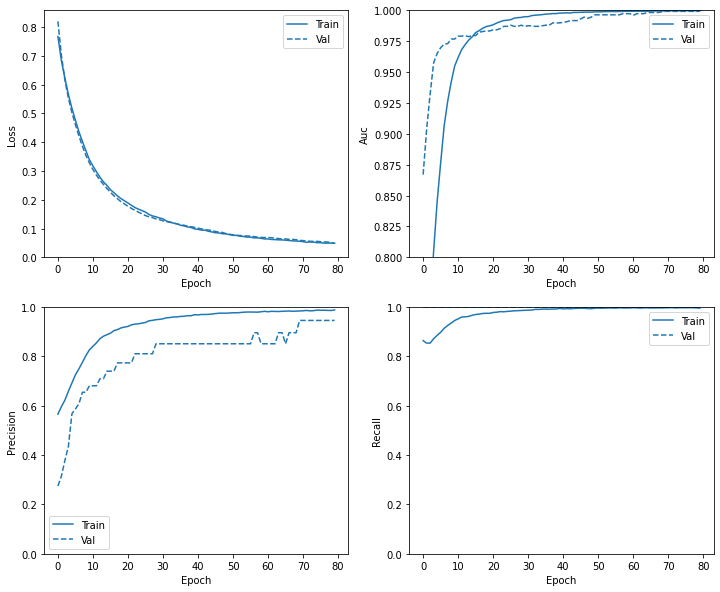

In [309]:
plot_metrics(resampled_history)

In [310]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.10035467892885208
tp :  20.0
fp :  6.0
tn :  74.0
fn :  0.0
accuracy :  0.9399999976158142
precision :  0.7692307829856873
recall :  1.0
auc :  0.9962500929832458

Legitimate Transactions Detected (True Negatives):  74
Legitimate Transactions Incorrectly Detected (False Positives):  6
Fraudulent Transactions Missed (False Negatives):  0
Fraudulent Transactions Detected (True Positives):  20
Total Fraudulent Transactions:  20


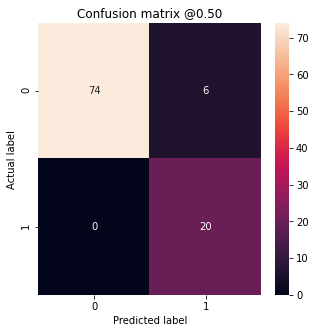

In [311]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

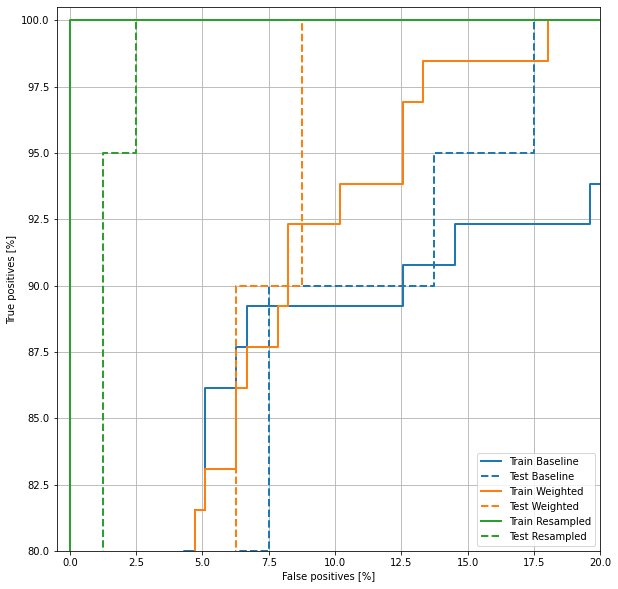

In [312]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')